In [46]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4: Putting it all together in a mini project

**This lab is an optional group lab.** You can choose to work alone of in a group of up to four students. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one of your GitHub repos.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.ubc.ca/MDS-2022-23/DSCI_573_lab4_wthass

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

The problem is to predict whether a client will default on their payment the next month or not. The dataset provides us with demographic and payment information for ~30,000 clients from Taiwan between April 2005 to September 2005 with no missing values. All the rows are numeric, but certain features seem to be categorical like ‘SEX’ and ‘MARRIAGE’ or ordinal like ‘EDUCATION’. The repayment status columns ‘PAY_0’ to ‘PAY_4’ seem like they may be the most useful in predicting whether a client will default the next month as a client already missing payments may be more likely to continue doing so. The “ID” column simply idenitifies the client and will not assist in prediction so it will be dropped and ‘default.payment.next.month’ will be renamed to target during preliminary preprocessing. All column names were also changed to lower case for ease of use later on.

In [47]:
# Import 
import sklearn # for tests
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures
)
from sklearn.metrics import recall_score, precision_score
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import (
    RandomizedSearchCV, cross_validate, train_test_split
)
from scipy.stats import loguniform
import pandas as pd
import numpy as np
from numpy.linalg import norm
import altair as alt
from pandas_profiling import ProfileReport
import eli5
import shap
import matplotlib
%matplotlib inline

In [48]:
# Read in the dataset
data = pd.read_csv("data/UCI_Credit_Card.csv")

# Some initial processing
data_processed = data.drop("ID", axis=1)
data_processed = data_processed.rename(columns={"default.payment.next.month": "target"})
data_processed.columns = data_processed.columns.str.lower()
data_processed["education"] = data_processed['education'].replace([0, 5, 6], 4)

# Display results
data_processed.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,target
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [49]:
# Split data into train, test, X and y
train_df, test_df = train_test_split(data_processed, test_size=0.8, random_state=123)
X_train, y_train = train_df.drop("target", axis=1), train_df["target"]
X_test, y_test = test_df.drop("target", axis=1), test_df["target"]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

1 & 2. (see plots from Pandas Profiler below for visuals). 
Our task is to predict whether a client will default on their payment next month or not (“target” == 0 is a predicted no, “target” == 1 is a predicted yes). The dataset provides us with demographic and payment information about 30,000 clients from Taiwan between April 2005 to September 2005. 

1. We can see that the majority of clients are clustered around similar values in each column (for example, the `BILL_AMT*` columns are all heavily right-skewed). In terms of the target’s classes, there is a strong class imbalance, as the class of client predicted to not default (target == 0) comprises only approximately 22% of all target classes, while the predicted to default class (target == 1) has the remaining 78%. We will include some hyperparameter optimization to see if we need to weight the classes to deal with this imbalance. The `pay_amt*` columns have average values between approximately 4,800 and 6,000 NT dollars, showing that many customers are paying back at least some of their credit card. Another statistic to note however, is that the average bill amounts range from 39,000 to 51,000 NT dollars, almost 10 times how much people are paying back to the company. These summary statistics show that people likely aren't able to pay their full bill amounts, leading to a default in their (near) future. 

2. Using Pandas Profiler, we can see that there are no missing values, all columns are numeric, but certain features seem to be categorical, like ‘SEX’ and ‘MARRIAGE’ or ordinal like ‘Education’. The repayment status columns ‘PAY_0’, and ‘PAY_2’ to ‘PAY_4’ seem like they may be the most useful in predicting whether a client will default the next month, as, intuitively, we can say that if a client is already missing payments, their financial situation is unlikely to change in such a short time and therefore they may be more likely to continue doing so. The “ID” column simply identifies the client and will not assist in prediction, so it will be dropped, and ‘default.payment.next.month’ will be renamed to “target” during preliminary preprocessing. 

3. An appropriate metric to choose for our classification is recall. This is important for our problem since we want to predict whether or not our customers are going to default. Thus, it is detrimental to our company if our model predicts someone is not going to default, but then does (as we now have to pay their bills), i.e. having a high number of false negatives. This is more important than accurately predicting true positives and true negatives; as well as minimizing false positives (i.e. the precision, where we predict someone is going to default but they don't) since both of these metrics wouldn't make the company lose more money than expected.

In [50]:
# Visualise feature distributions
train_df.describe()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,target
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.00000,6000.00000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,164925.000000,1.596333,1.840500,1.554833,35.498500,-0.01300,-0.15800,-0.188333,-0.226500,-0.279000,...,42279.732500,39323.825667,38333.300667,5346.285500,5.524281e+03,5025.377167,4564.488167,4907.271833,4911.409333,0.225333
std,127459.282465,0.490673,0.741047,0.521573,9.211812,1.10289,1.17428,1.181706,1.158629,1.131388,...,63590.010023,59417.141387,58943.761514,15334.656413,2.206034e+04,16074.027571,12741.667902,16964.222849,15374.157227,0.417836
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.00000,-2.00000,-2.000000,-2.000000,-2.000000,...,-27490.000000,-61372.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.00000,-1.000000,-1.000000,-1.000000,...,1904.500000,1478.250000,1067.250000,1000.000000,8.360000e+02,390.000000,270.000000,200.000000,100.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,18592.000000,17912.000000,16886.000000,2120.000000,2.000000e+03,1723.000000,1500.000000,1500.000000,1485.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,51620.250000,49018.750000,48654.000000,5003.250000,5.000000e+03,4300.000000,4000.000000,4000.000000,4000.000000,0.000000
max,750000.000000,2.000000,4.000000,3.000000,75.000000,8.00000,7.00000,8.000000,7.000000,7.000000,...,525749.000000,516139.000000,514975.000000,493358.000000,1.227082e+06,417588.000000,211250.000000,426529.000000,261883.000000,1.000000


In [51]:
# Visualise distributions of the `bill_amt` features
train_df.loc[:, ["bill_amt1","bill_amt2","bill_amt3","bill_amt4", "bill_amt5", "bill_amt6"]].describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,50525.367000,48319.724833,45769.137833,42279.732500,39323.825667,38333.300667
std,72865.336062,70023.772180,67597.803275,63590.010023,59417.141387,58943.761514
min,-15308.000000,-67526.000000,-157264.000000,-27490.000000,-61372.000000,-209051.000000
25%,3428.000000,2829.000000,2529.000000,1904.500000,1478.250000,1067.250000
50%,22094.500000,20699.000000,19941.500000,18592.000000,17912.000000,16886.000000
75%,65386.500000,61402.500000,58665.000000,51620.250000,49018.750000,48654.000000
max,630458.000000,646770.000000,693131.000000,525749.000000,516139.000000,514975.000000


In [52]:
# Visualise class imbalance
train_df["target"].value_counts(normalize=True)

0    0.774667
1    0.225333
Name: target, dtype: float64

In [53]:
# Visualise feature correlations
corr_matrx = train_df.corr('spearman').style.background_gradient()
corr_matrx

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,target
limit_bal,1.000000,0.054219,-0.283218,-0.121275,0.169703,-0.277747,-0.331551,-0.327369,-0.304626,-0.272750,-0.264782,0.053044,0.041497,0.052678,0.068637,0.070440,0.086882,0.252361,0.272074,0.270193,0.266919,0.291175,0.312582,-0.162072
sex,0.054219,1.000000,0.004627,-0.018303,-0.094524,-0.045353,-0.073664,-0.071624,-0.068848,-0.054458,-0.028936,-0.041394,-0.041403,-0.029318,-0.022441,-0.013960,-0.017943,0.001916,0.015591,0.022412,0.004679,-0.010977,0.021077,-0.045729
education,-0.283218,0.004627,1.000000,-0.150258,0.164486,0.127532,0.165080,0.163944,0.152345,0.140276,0.126674,0.088889,0.091044,0.077819,0.067075,0.056837,0.046426,-0.032702,-0.044586,-0.042041,-0.053336,-0.058699,-0.051043,0.035589
marriage,-0.121275,-0.018303,-0.150258,1.000000,-0.469857,0.038623,0.050101,0.057031,0.055631,0.056936,0.058298,0.010985,0.020524,0.007918,0.018611,0.012688,0.014484,0.005500,-0.013959,0.007054,-0.004581,-0.011922,-0.027546,-0.019348
age,0.169703,-0.094524,0.164486,-0.469857,1.000000,-0.058774,-0.077041,-0.082902,-0.086083,-0.088261,-0.085713,0.006139,0.004995,0.001718,-0.005658,-0.001507,-0.005247,0.030699,0.036996,0.025372,0.036099,0.037776,0.052408,-0.016453
pay_0,-0.277747,-0.045353,0.127532,0.038623,-0.058774,1.000000,0.598860,0.529407,0.498789,0.455557,0.448382,0.307252,0.326215,0.312584,0.299264,0.288303,0.281083,-0.094578,-0.064069,-0.054067,-0.017366,-0.021917,-0.057878,0.286828
pay_2,-0.331551,-0.073664,0.165080,0.050101,-0.077041,0.598860,1.000000,0.806771,0.716112,0.666321,0.635248,0.583964,0.567776,0.534431,0.505999,0.485770,0.463936,0.043579,0.090677,0.105533,0.122912,0.115195,0.082676,0.208960
pay_3,-0.327369,-0.071624,0.163944,0.057031,-0.082902,0.529407,0.806771,1.000000,0.811378,0.705847,0.676496,0.543922,0.604955,0.580389,0.543559,0.521021,0.495529,0.234082,0.054022,0.125595,0.152706,0.143323,0.094571,0.188951
pay_4,-0.304626,-0.068848,0.152345,0.055631,-0.086083,0.498789,0.716112,0.811378,1.000000,0.804160,0.722300,0.510791,0.560025,0.624185,0.585016,0.556027,0.529362,0.195966,0.248312,0.074538,0.170316,0.179877,0.132492,0.179214
pay_5,-0.272750,-0.054458,0.140276,0.056936,-0.088261,0.455557,0.666321,0.705847,0.804160,1.000000,0.822742,0.491842,0.530906,0.578062,0.652367,0.619086,0.580779,0.181286,0.230066,0.286126,0.137552,0.210171,0.166954,0.154646


In [54]:
# Create more in-depth visualisation of features
profile = ProfileReport(train_df, title="Pandas Profiling Report", minimal=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

In the feature engineering, we try to create new columns by taking the (natural) logarithm of the `pay_amt` columns. These transformations will allow the outliers to have less of an effect on the model by linearizing any exponential relations, i.e. the people who are paying much more (exponentially so) compared to people who paying closer to zero. We want to see how far each amount is compared to having paid nothing previously (i.e. a value of 0), so we take the natural logarithm and convert any `-Inf` back to zero, as those are the people who payed nothing in their previous payment. In nature, many relationships are modelled by logarithmic relationships, so we attempt to try that same practice here. 

In [55]:
# Copy train and test set
nfeats_train_df = train_df.copy()
nfeats_test_df = test_df.copy()

np.seterr(divide = 'ignore')

# Perform feature engineering by taking the logarithm of the `pay_amt` columns
for i in range(6):
    nfeats_train_df[f"log_pay_amt{i+1}"] = np.log(nfeats_train_df.loc[:, f"pay_amt{i+1}"]).apply(np.nan_to_num, neginf=0) 
    nfeats_test_df[f"log_pay_amt{i+1}"] = np.log(nfeats_test_df.loc[:, f"pay_amt{i+1}"]).apply(np.nan_to_num, neginf=0) 

np.seterr(divide = 'warn') 

# Split into X and y
nfeats_X_train, nfeats_y_train = nfeats_train_df.drop("target", axis=1), nfeats_train_df["target"]
nfeats_X_test, nfeats_y_test = nfeats_test_df.drop("target", axis=1), nfeats_test_df["target"]

# Display results
nfeats_train_df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,pay_amt4,pay_amt5,pay_amt6,target,log_pay_amt1,log_pay_amt2,log_pay_amt3,log_pay_amt4,log_pay_amt5,log_pay_amt6
15731,220000.0,1,1,1,42,-1,-1,-1,-1,0,...,0.0,5131.0,0.0,0,5.049856,0.000000,10.829927,0.000000,8.543056,0.000000
5690,80000.0,1,1,2,38,-1,-1,-1,0,-1,...,390.0,332.0,780.0,1,5.556828,8.928508,0.000000,5.966147,5.805135,6.659294
16476,50000.0,2,3,1,69,0,0,0,0,0,...,2000.0,605.0,1000.0,0,7.600902,7.600902,7.600902,7.600902,6.405228,6.907755
6849,70000.0,2,2,2,55,0,0,0,0,0,...,1674.0,1677.0,1697.0,0,7.661056,7.745436,7.391415,7.422971,7.424762,7.436617
21953,270000.0,2,1,2,26,0,0,0,0,0,...,3762.0,3907.0,4207.0,0,8.768574,8.692658,8.833900,8.232706,8.270525,8.344505


In [56]:
# Categorise features for dataset with new features
categorical_features = ["marriage"] # encoded ordinally, but actually categorical
binary_features = ["sex"] # encoded with 1,2 - maybe a good idea to switch to 0,1?
passthrough_features = ["pay_0", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6", "education"] # ordinal features already encoded
nfeats_numeric_features = [
    "limit_bal",
    "age",
    "bill_amt1",
    "bill_amt2",
    "bill_amt3",
    "bill_amt4",
    "bill_amt5",
    "bill_amt6",
    "pay_amt1",
    "pay_amt2",
    "pay_amt3",
    "pay_amt4",
    "pay_amt5",
    "pay_amt6",
    "log_pay_amt1",
    "log_pay_amt2",
    "log_pay_amt3",
    "log_pay_amt4",
    "log_pay_amt5",
    "log_pay_amt6",
]

# Create preprocessor for dataset with new features
nfeats_preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    (OneHotEncoder(drop='if_binary'), binary_features),
    (StandardScaler(), nfeats_numeric_features),
    ("passthrough", passthrough_features)
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

In [57]:
# Categorise features
categorical_features = ["marriage"] # encoded ordinally, but actually categorical
binary_features = ["sex"] # encoded with 1,2 - maybe a good idea to switch to 0,1?
passthrough_features = ["pay_0", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6", "education"] # ordinal features already encoded
numeric_features = [
    "limit_bal",
    "age",
    "bill_amt1",
    "bill_amt2",
    "bill_amt3",
    "bill_amt4",
    "bill_amt5",
    "bill_amt6",
    "pay_amt1",
    "pay_amt2",
    "pay_amt3",
    "pay_amt4",
    "pay_amt5",
    "pay_amt6",
]

# Create preprocessor
preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    (OneHotEncoder(drop='if_binary'), binary_features),
    (StandardScaler(), numeric_features),
    ("passthrough", passthrough_features)
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

In [58]:
# Attributed to Varada, DSCI 571
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [59]:
# Define dictionary to store results
cross_val_results = {}

# Establish scoring metrics
classification_metrics = ["accuracy", "precision", "recall", "f1"]

# Establish baseline by scoring training set on dummy classifier
dc = DummyClassifier()
cross_val_results["Dummy"] = mean_std_cross_val_scores(
    dc, X_train, y_train, return_train_score=True, scoring=classification_metrics, n_jobs=-1
)

# Display results
pd.DataFrame(cross_val_results).T

/opt/miniconda3/envs/573/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/573/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/573/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/573/lib/python3.10/site-packages/sklearn/metrics/_classification

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
Dummy,0.002 (+/- 0.000),0.006 (+/- 0.001),0.775 (+/- 0.000),0.775 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

Since this is a classification problem, our first linear model we attempt is Logistic Regression. In order to tune our regularisation hyperparameter, we perform a random search to optimise the recall metric. After this, we perform cross-validation to see how we scored on our classification metric.

As we can see from the results, we initially get a pretty high accuracy, however our f1 and recall scores are very low, even after our model determined that setting `class_weight="balanced"` resulted in a better recall. This means that we have a high number of false negatives, which is exactly what we want to prevent. We will consider different hyperparameter values and alternate models to see if we can improve our recall score.

Aside from this, it's worth mentioning that we end up with low standard deviations for all of our classification metrics, which indicates that our model is performing well across the cross validation folds, and not just 'getting lucky'.

In [60]:
# Establish parameter grid for optimising of hyperparameters
lr_param = {
    'logisticregression__C': loguniform(1e-3, 1e3),
    'logisticregression__class_weight': [None, "balanced"]
}

# Perform cross-validation on logistic regression model with default hyperparameters
pipe_lr = make_pipeline(preprocessor, LogisticRegression(random_state=123, max_iter=1000))
cross_val_results["Logistic Regression"] = mean_std_cross_val_scores(
    pipe_lr, X_train, y_train, return_train_score=True,
    scoring=classification_metrics, n_jobs=-1
)

# Perform hyperparameter tuning to optimise recall
random_search_lr = RandomizedSearchCV(
    pipe_lr, lr_param, n_iter=20, n_jobs=-1, scoring='recall', random_state=123
)

# Perform cross-validation on optimised logistic regression model
cross_val_results["Tuned Logistic Regression"] = mean_std_cross_val_scores(
    random_search_lr, X_train, y_train, return_train_score=True,
    scoring=classification_metrics, n_jobs=-1
)

# Display results
pd.DataFrame(cross_val_results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
Dummy,0.002 (+/- 0.000),0.006 (+/- 0.001),0.775 (+/- 0.000),0.775 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
Logistic Regression,0.091 (+/- 0.021),0.011 (+/- 0.002),0.804 (+/- 0.003),0.807 (+/- 0.003),0.694 (+/- 0.032),0.704 (+/- 0.008),0.237 (+/- 0.030),0.248 (+/- 0.016),0.352 (+/- 0.032),0.366 (+/- 0.018)
Tuned Logistic Regression,11.266 (+/- 0.172),0.015 (+/- 0.007),0.670 (+/- 0.019),0.674 (+/- 0.003),0.369 (+/- 0.018),0.373 (+/- 0.003),0.646 (+/- 0.017),0.659 (+/- 0.006),0.469 (+/- 0.015),0.477 (+/- 0.003)


In [61]:
# Fit optimised model on training data
random_search_lr.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('onehotencoder-1',
                                                                               OneHotEncoder(),
                                                                               ['marriage']),
                                                                              ('onehotencoder-2',
                                                                               OneHotEncoder(drop='if_binary'),
                                                                               ['sex']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['limit_bal',
                                                                                'age',
                                                                                'bill_amt1',
                                                                                'bill_amt2',
                                                                                'bill_amt3',
                                                                                'bill_amt4',
                                                                                'bill_amt5',
                                                                                'bill_amt6',
                                                                                'pay_amt1',
                                                                                'pay_a...
                                                                                'pay_3',
                                                                                'pay_4',
                                                                                'pay_5',
                                                                                'pay_6',
                                                                                'education'])])),
                                             ('logisticregression',
                                              LogisticRegression(max_iter=1000,
                                                                 random_state=123))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x169154f10>,
                                        'logisticregression__class_weight': [None,
                                                                             'balanced']},
                   random_state=123, scoring='recall')

In [62]:
# Print optimised hyperparameter values
lg_C = random_search_lr.best_params_["logisticregression__C"]
print("Logistic Regression C:", lg_C)
print("Logistic Regression Alpha:", 1/lg_C)
print("Class Weight:", random_search_lr.best_params_["logisticregression__class_weight"])

Logistic Regression C: 847.1722451834725
Logistic Regression Alpha: 0.0011803974996648168
Class Weight: balanced


In [63]:
# Repeat previous steps for the feature engineered dataset: 

# Perform cross-validation on logistic regression model with default hyperparameters
nfeats_pipe_lr = make_pipeline(nfeats_preprocessor, LogisticRegression(random_state=123, max_iter=1000))
cross_val_results["New Feats Logistic Regression"] = mean_std_cross_val_scores(
    nfeats_pipe_lr, nfeats_X_train, nfeats_y_train, return_train_score=True,
    scoring=classification_metrics, n_jobs=-1
)

# Perform hyperparameter tuning to optimise recall
nfeats_random_search_lr = RandomizedSearchCV(
    nfeats_pipe_lr, lr_param, n_iter=20, n_jobs=-1, scoring='recall', random_state=123
)

# Perform cross-validation on optimised logistic regression model
cross_val_results["New Feats Tuned Logistic Regression"] = mean_std_cross_val_scores(
    nfeats_random_search_lr, nfeats_X_train, nfeats_y_train, return_train_score=True,
    scoring=classification_metrics, n_jobs=-1
)

# Display results
pd.DataFrame(cross_val_results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
Dummy,0.002 (+/- 0.000),0.006 (+/- 0.001),0.775 (+/- 0.000),0.775 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
Logistic Regression,0.091 (+/- 0.021),0.011 (+/- 0.002),0.804 (+/- 0.003),0.807 (+/- 0.003),0.694 (+/- 0.032),0.704 (+/- 0.008),0.237 (+/- 0.030),0.248 (+/- 0.016),0.352 (+/- 0.032),0.366 (+/- 0.018)
Tuned Logistic Regression,11.266 (+/- 0.172),0.015 (+/- 0.007),0.670 (+/- 0.019),0.674 (+/- 0.003),0.369 (+/- 0.018),0.373 (+/- 0.003),0.646 (+/- 0.017),0.659 (+/- 0.006),0.469 (+/- 0.015),0.477 (+/- 0.003)
New Feats Logistic Regression,0.111 (+/- 0.014),0.014 (+/- 0.001),0.802 (+/- 0.004),0.803 (+/- 0.002),0.668 (+/- 0.035),0.671 (+/- 0.010),0.247 (+/- 0.031),0.249 (+/- 0.007),0.359 (+/- 0.030),0.364 (+/- 0.008)
New Feats Tuned Logistic Regression,10.494 (+/- 0.251),0.010 (+/- 0.003),0.730 (+/- 0.010),0.735 (+/- 0.003),0.433 (+/- 0.013),0.440 (+/- 0.004),0.642 (+/- 0.007),0.648 (+/- 0.005),0.517 (+/- 0.009),0.524 (+/- 0.004)


Since the feature engineering did not seem to add any new insights here, we will not continue to use it in the next parts of this analysis. Also, the feature engineering would only help in linear models whereas the next models are innately able to capture non-linear relationships anyways, thus ending the feature engineering section of this analysis.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

The three other models that were added were SVM classifier, random forest classifier and a stacked model containing Logistic Regression, LightGBM and XGBoost classifiers. In terms of fit times, the stacked model had the longest fit time with SVC and random forest following. Meanwhile, SVC had the longest score time with the stacked model and random forest following suit. For this problem, recall is the most important metric since we want to reduce false negative rates. Random forest classifier was severely overfit with a train recall of 0.999 and a test recall of 0.369, (this could be due to the max_depth not being set). The stacked model was slightly overfit with a train recall of 0.443 and a test recall of 0.354. Lastly, SVC reported a train recall of 0.355 and a test recall of 0.341. In terms of these three models and their performance compared to the linear model, both SVC and the stacked model outperformed logistic regression in terms of recall score with logistic regression obtaining a 0.235 and 0.234 for the train and test recall.

In [64]:
# Define pipelines for different models
pipe_svc = make_pipeline(preprocessor, SVC(random_state=123))
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=123))
pipe_lgbm = make_pipeline(preprocessor, LGBMClassifier(random_state=123))
pipe_xgb = make_pipeline(preprocessor, XGBClassifier(random_state=123))

classifiers = {
    "Logistic Regression": pipe_lr,
    "LightGBM": pipe_lgbm,
    "XGBoost": pipe_xgb
}

models = {
    "SVC": pipe_svc,
    "Random Forest": pipe_rf,
    "Stacking Model": StackingClassifier(list(classifiers.items()))
}

# Perform crossvalidation on each model
for model_name, model in models.items():
    cross_val_results[model_name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True,
        scoring=classification_metrics, n_jobs=-1
        )

In [65]:
# Display results
pd.DataFrame(cross_val_results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
Dummy,0.002 (+/- 0.000),0.006 (+/- 0.001),0.775 (+/- 0.000),0.775 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
Logistic Regression,0.091 (+/- 0.021),0.011 (+/- 0.002),0.804 (+/- 0.003),0.807 (+/- 0.003),0.694 (+/- 0.032),0.704 (+/- 0.008),0.237 (+/- 0.030),0.248 (+/- 0.016),0.352 (+/- 0.032),0.366 (+/- 0.018)
Tuned Logistic Regression,11.266 (+/- 0.172),0.015 (+/- 0.007),0.670 (+/- 0.019),0.674 (+/- 0.003),0.369 (+/- 0.018),0.373 (+/- 0.003),0.646 (+/- 0.017),0.659 (+/- 0.006),0.469 (+/- 0.015),0.477 (+/- 0.003)
New Feats Logistic Regression,0.111 (+/- 0.014),0.014 (+/- 0.001),0.802 (+/- 0.004),0.803 (+/- 0.002),0.668 (+/- 0.035),0.671 (+/- 0.010),0.247 (+/- 0.031),0.249 (+/- 0.007),0.359 (+/- 0.030),0.364 (+/- 0.008)
New Feats Tuned Logistic Regression,10.494 (+/- 0.251),0.010 (+/- 0.003),0.730 (+/- 0.010),0.735 (+/- 0.003),0.433 (+/- 0.013),0.440 (+/- 0.004),0.642 (+/- 0.007),0.648 (+/- 0.005),0.517 (+/- 0.009),0.524 (+/- 0.004)
SVC,0.917 (+/- 0.011),0.459 (+/- 0.007),0.816 (+/- 0.007),0.827 (+/- 0.001),0.685 (+/- 0.033),0.729 (+/- 0.006),0.338 (+/- 0.022),0.367 (+/- 0.005),0.452 (+/- 0.024),0.488 (+/- 0.005)
Random Forest,1.237 (+/- 0.011),0.038 (+/- 0.002),0.812 (+/- 0.004),1.000 (+/- 0.000),0.637 (+/- 0.010),1.000 (+/- 0.000),0.383 (+/- 0.031),0.998 (+/- 0.001),0.478 (+/- 0.026),0.999 (+/- 0.001)
Stacking Model,9.120 (+/- 0.056),0.037 (+/- 0.003),0.815 (+/- 0.004),0.879 (+/- 0.004),0.677 (+/- 0.029),0.949 (+/- 0.016),0.347 (+/- 0.018),0.490 (+/- 0.014),0.458 (+/- 0.014),0.647 (+/- 0.015)


In [66]:
# Number of features
X_train.columns.size

23

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

The feature selection we performed did not improve the CV scores for recall. We attempted `RFECV` with logistic regression and the piped the results to all of our models. Only three features were selected by `RFECV`: `onehotencoder-1__marriage_0`, `standardscaler__pay_amt2`,
and `passthrough__pay_0`.
We debated using the model with only three features, however, all of the RFE models had smaller differences between cross-validation scores and training scores, leading us to think that they were overfitting less. Ultimately, we chose the larger model with the higher scores.

In [67]:
# Define feature selection algorithm
rfe = RFECV(LogisticRegression(max_iter=1000))

# Add feature selection to pipelines
pipe_rfe_lr = make_pipeline(preprocessor, rfe, LogisticRegression(random_state=123, max_iter=1000))
pipe_rfe_svc = make_pipeline(preprocessor, rfe, SVC(random_state=123))
pipe_rfe_rf = make_pipeline(preprocessor, rfe, RandomForestClassifier(random_state=123))
pipe_rfe_lgbm = make_pipeline(preprocessor, rfe, LGBMClassifier(random_state=123))
pipe_rfe_xgb = make_pipeline(preprocessor, rfe, XGBClassifier(random_state=123))

classifiers_rfe = {
    "Logistic Regression": pipe_rfe_lr,
    "LightGBM": pipe_rfe_lgbm,
    "XGBoost": pipe_rfe_xgb
}

models_rfe = {
    "RFE SVC": pipe_rfe_svc,
    "RFE Random Forest": pipe_rfe_rf,
    "RFE Stacking Model": StackingClassifier(list(classifiers_rfe.items()))
}

# Perform cross-validation on models with feature selection
for model_name, model in models_rfe.items():
    cross_val_results[model_name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True,
        scoring=classification_metrics, n_jobs=-1
        )

In [68]:
# Display results
pd.DataFrame(cross_val_results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
Dummy,0.002 (+/- 0.000),0.006 (+/- 0.001),0.775 (+/- 0.000),0.775 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
Logistic Regression,0.091 (+/- 0.021),0.011 (+/- 0.002),0.804 (+/- 0.003),0.807 (+/- 0.003),0.694 (+/- 0.032),0.704 (+/- 0.008),0.237 (+/- 0.030),0.248 (+/- 0.016),0.352 (+/- 0.032),0.366 (+/- 0.018)
Tuned Logistic Regression,11.266 (+/- 0.172),0.015 (+/- 0.007),0.670 (+/- 0.019),0.674 (+/- 0.003),0.369 (+/- 0.018),0.373 (+/- 0.003),0.646 (+/- 0.017),0.659 (+/- 0.006),0.469 (+/- 0.015),0.477 (+/- 0.003)
New Feats Logistic Regression,0.111 (+/- 0.014),0.014 (+/- 0.001),0.802 (+/- 0.004),0.803 (+/- 0.002),0.668 (+/- 0.035),0.671 (+/- 0.010),0.247 (+/- 0.031),0.249 (+/- 0.007),0.359 (+/- 0.030),0.364 (+/- 0.008)
New Feats Tuned Logistic Regression,10.494 (+/- 0.251),0.010 (+/- 0.003),0.730 (+/- 0.010),0.735 (+/- 0.003),0.433 (+/- 0.013),0.440 (+/- 0.004),0.642 (+/- 0.007),0.648 (+/- 0.005),0.517 (+/- 0.009),0.524 (+/- 0.004)
SVC,0.917 (+/- 0.011),0.459 (+/- 0.007),0.816 (+/- 0.007),0.827 (+/- 0.001),0.685 (+/- 0.033),0.729 (+/- 0.006),0.338 (+/- 0.022),0.367 (+/- 0.005),0.452 (+/- 0.024),0.488 (+/- 0.005)
Random Forest,1.237 (+/- 0.011),0.038 (+/- 0.002),0.812 (+/- 0.004),1.000 (+/- 0.000),0.637 (+/- 0.010),1.000 (+/- 0.000),0.383 (+/- 0.031),0.998 (+/- 0.001),0.478 (+/- 0.026),0.999 (+/- 0.001)
Stacking Model,9.120 (+/- 0.056),0.037 (+/- 0.003),0.815 (+/- 0.004),0.879 (+/- 0.004),0.677 (+/- 0.029),0.949 (+/- 0.016),0.347 (+/- 0.018),0.490 (+/- 0.014),0.458 (+/- 0.014),0.647 (+/- 0.015)
RFE SVC,4.420 (+/- 0.170),0.271 (+/- 0.018),0.815 (+/- 0.004),0.819 (+/- 0.002),0.699 (+/- 0.025),0.717 (+/- 0.013),0.315 (+/- 0.019),0.325 (+/- 0.008),0.434 (+/- 0.019),0.447 (+/- 0.007)
RFE Random Forest,4.340 (+/- 0.122),0.034 (+/- 0.003),0.776 (+/- 0.019),0.928 (+/- 0.050),0.515 (+/- 0.076),0.918 (+/- 0.071),0.328 (+/- 0.033),0.737 (+/- 0.174),0.398 (+/- 0.026),0.814 (+/- 0.134)


In [69]:
# Fit training data to optimised model
pipe_rfe_svc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder-1',
                                                  OneHotEncoder(),
                                                  ['marriage']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['limit_bal', 'age',
                                                   'bill_amt1', 'bill_amt2',
                                                   'bill_amt3', 'bill_amt4',
                                                   'bill_amt5', 'bill_amt6',
                                                   'pay_amt1', 'pay_amt2',
                                                   'pay_amt3', 'pay_amt4',
                                                   'pay_amt5', 'pay_amt6']),
                                                 ('passthrough', 'passthrough',
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                   'pay_4', 'pay_5', 'pay_6',
                                                   'education'])])),
                ('rfecv', RFECV(estimator=LogisticRegression(max_iter=1000))),
                ('svc', SVC(random_state=123))])

In [70]:
# Display selected features
pipe_rfe_lr.fit(X_train, y_train)
print(pipe_rfe_lr[:-1].get_feature_names_out())
print(pipe_rfe_lr[:-1].get_feature_names_out().size)

# Got 3 same features for each model using RFE 

['onehotencoder-1__marriage_0' 'standardscaler__pay_amt2'
 'passthrough__pay_0']
3


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

We used `RandomizedSearchCV` to optimize multiple hyperparameters for all of the models used. For the `Stacked` model, we optimize each model individually and then stacked the optimized models. When available, we attempted to optimize the `class_weight` due to the class imbalance in our dataset. The optimal hyperparameters for each model are listed below. Due to the limitations in computing power, we were only able to use 10 iterations for hyperparameter optimization, which means it is plausible that there are better hyperparameters that were not hit during our search. In each case, a `balanced` class weight was optimal and the various other hyperparameters that controls regularization had values between 0 and 1. For the decision tree models (`lgbm` and `RandomForest`), the max depth was found 96 and 50, respectively. 

In [71]:
# Define parameter grids
params = [
    {
        "svc__class_weight": [None, "balanced"],
        "svc__gamma": loguniform(1e-3, 1e3),
        "svc__C": loguniform(1e-3, 1e3)
    },
    {
        "logisticregression__class_weight": [None, "balanced"],
        "logisticregression__C": loguniform(1e-3, 1e3),
    },
    {
        "xgbclassifier__gamma": loguniform(1e-3, 1e3)
    },
    {
        "lgbmclassifier__class_weight": [None, "balanced"],
        "lgbmclassifier__max_depth": np.arange(10, 100, 1)
    },
    {
        "randomforestclassifier__max_features": ["sqrt", "log2", None],
        "randomforestclassifier__max_depth": np.arange(10, 100)
    }
]

classifiers_tuning = {
    "SVC": pipe_svc,
    "Logistic Regression": pipe_lr,
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm,
    "Random Forest": pipe_rf
}

optim_models = {}

# Perform hyperparameter tuning on each model and display optimal hyperparameter values
for i, model_name in enumerate(classifiers_tuning):
    print(model_name)
    param_grid = params[i]
    model = classifiers_tuning[model_name]
    random_search = RandomizedSearchCV(
        model, param_grid, n_iter=10, n_jobs=-1, random_state=123,
        scoring="recall", return_train_score=True
    )
    random_search.fit(X_train, y_train)
    optim_models[model_name] = random_search.best_estimator_
    print(random_search.best_params_)

SVC
{'svc__C': 0.11456925707187304, 'svc__class_weight': 'balanced', 'svc__gamma': 0.08808568992665847}
Logistic Regression
{'logisticregression__C': 5.806334557802442, 'logisticregression__class_weight': 'balanced'}
XGBoost
{'xgbclassifier__gamma': 2.0318358298265977}
LightGBM
{'lgbmclassifier__max_depth': 96, 'lgbmclassifier__class_weight': 'balanced'}
Random Forest
{'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 50}


In [72]:
# Perform cross-validation on each tuned model
tuned_classifiers = {
    "Logistic Regression": optim_models["Logistic Regression"],
    "LightGBM": optim_models["LightGBM"],
    "XGBoost": optim_models["XGBoost"]
}

tuned_models = {
    "Tuned SVC": optim_models["SVC"],
    "Tuned Random Forest": optim_models["Random Forest"],
    "Tuned Stacking Model": StackingClassifier(list(tuned_classifiers.items()))
}

for model_name, model in tuned_models.items():
    cross_val_results[model_name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True,
        scoring=classification_metrics, n_jobs=-1
        )

In [73]:
# Display results
pd.DataFrame(cross_val_results).T.sort_values("test_recall", ascending=False)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
Tuned Logistic Regression,11.266 (+/- 0.172),0.015 (+/- 0.007),0.670 (+/- 0.019),0.674 (+/- 0.003),0.369 (+/- 0.018),0.373 (+/- 0.003),0.646 (+/- 0.017),0.659 (+/- 0.006),0.469 (+/- 0.015),0.477 (+/- 0.003)
New Feats Tuned Logistic Regression,10.494 (+/- 0.251),0.010 (+/- 0.003),0.730 (+/- 0.010),0.735 (+/- 0.003),0.433 (+/- 0.013),0.440 (+/- 0.004),0.642 (+/- 0.007),0.648 (+/- 0.005),0.517 (+/- 0.009),0.524 (+/- 0.004)
Tuned SVC,1.335 (+/- 0.028),0.515 (+/- 0.009),0.762 (+/- 0.013),0.779 (+/- 0.004),0.478 (+/- 0.024),0.509 (+/- 0.008),0.583 (+/- 0.010),0.615 (+/- 0.007),0.525 (+/- 0.016),0.557 (+/- 0.004)
Random Forest,1.237 (+/- 0.011),0.038 (+/- 0.002),0.812 (+/- 0.004),1.000 (+/- 0.000),0.637 (+/- 0.010),1.000 (+/- 0.000),0.383 (+/- 0.031),0.998 (+/- 0.001),0.478 (+/- 0.026),0.999 (+/- 0.001)
Tuned Random Forest,1.122 (+/- 0.026),0.035 (+/- 0.002),0.812 (+/- 0.004),1.000 (+/- 0.000),0.637 (+/- 0.010),1.000 (+/- 0.000),0.383 (+/- 0.031),0.998 (+/- 0.001),0.478 (+/- 0.026),0.999 (+/- 0.001)
Tuned Stacking Model,7.785 (+/- 0.063),0.033 (+/- 0.001),0.818 (+/- 0.005),0.879 (+/- 0.004),0.677 (+/- 0.025),0.913 (+/- 0.015),0.371 (+/- 0.016),0.511 (+/- 0.011),0.479 (+/- 0.016),0.655 (+/- 0.013)
Stacking Model,9.120 (+/- 0.056),0.037 (+/- 0.003),0.815 (+/- 0.004),0.879 (+/- 0.004),0.677 (+/- 0.029),0.949 (+/- 0.016),0.347 (+/- 0.018),0.490 (+/- 0.014),0.458 (+/- 0.014),0.647 (+/- 0.015)
SVC,0.917 (+/- 0.011),0.459 (+/- 0.007),0.816 (+/- 0.007),0.827 (+/- 0.001),0.685 (+/- 0.033),0.729 (+/- 0.006),0.338 (+/- 0.022),0.367 (+/- 0.005),0.452 (+/- 0.024),0.488 (+/- 0.005)
RFE Random Forest,4.340 (+/- 0.122),0.034 (+/- 0.003),0.776 (+/- 0.019),0.928 (+/- 0.050),0.515 (+/- 0.076),0.918 (+/- 0.071),0.328 (+/- 0.033),0.737 (+/- 0.174),0.398 (+/- 0.026),0.814 (+/- 0.134)
RFE SVC,4.420 (+/- 0.170),0.271 (+/- 0.018),0.815 (+/- 0.004),0.819 (+/- 0.002),0.699 (+/- 0.025),0.717 (+/- 0.013),0.315 (+/- 0.019),0.325 (+/- 0.008),0.434 (+/- 0.019),0.447 (+/- 0.007)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

For this section, we inspect our `RFC` (Random Forest Classifier) model. We extract the feature importances using the `eli5` method (explain like I'm five), which gives us a table of our features, sorted by importance.

We can see that `pay_0` is by far the most important feature when it comes to classifying whether someone will default on their next month's credit card bill. This inherently makes sense: if someone defaulted on their previous bill, it often indicates they're in financial rough waters which are often not resolved within a month, leading to them missing the next month's  bill too.

The next couple of features aren't as strong as `pay_0` but can easily be explained:
- `age` plays a major role in someones financial status. As you become older, you often get the opportunity to set money aside and build up savings. If you encounter a bad financial month, you can rely on your savings to cover your credit card bill.
- `bill_amt1` is the amount of the bill in September. Logically a higher bill will increase the probability of someone defaulting on their payment.
- `limit_bal` is the amount of given credit. If you have a lower amount of given credit, you will have a higher probability of defaulting on your payment. This might be due to the individual not making full payments on time and thus not gaining higher credit privileges.

Lastly, it appears as though, of the features selected by our model, `pay_5` and other earlier months have little effect on classifying whether someone will default on their payment. This would make sense: wether someone defaulted on their payment months ago has less impact on future payments the further back you go.

In [74]:
# Visualise feature importances 
explan = eli5.explain_weights(
    optim_models['Random Forest'].named_steps['randomforestclassifier'], feature_names=pipe_lr[:-1].get_feature_names_out().tolist()
)
eli5.format_as_dataframe(explan)

,feature,weight,std
0,passthrough__pay_0,0.101379,0.041238
1,standardscaler__age,0.065591,0.008915
2,standardscaler__limit_bal,0.057237,0.007523
3,standardscaler__bill_amt1,0.055994,0.008804
4,standardscaler__pay_amt1,0.052036,0.011298
5,standardscaler__bill_amt2,0.050010,0.008928
6,standardscaler__bill_amt3,0.048870,0.008908
7,standardscaler__bill_amt6,0.048740,0.009011
8,standardscaler__bill_amt5,0.048596,0.008106
9,standardscaler__bill_amt4,0.048524,0.007629


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

The best performing model is the hyperparameter tuned logistic regression model. We will use this model on the test data set and conduct predictions on two examples. We trust our results since the test scores are in agreeance with the CV scores found previously for the model, which had low standard deviations such that the model isn't trained on outlier data or operating weirdly. We don't believe that there is any optimization bias since the training data is large enough that we won't hit the same fold multiple times when running the cross-validation.

We produce two SHAP force plots for two different examples; one where the customer defaults and one where they do not (positive and negative class). In the example where the customer does not default, the output of the model is lower than the base value (thus predicting no default). We see that the `pay_amt6` feature is contributing the most to predicting this negative class (with a value of 6.187) while the customer's marital status is pushing the model to predict that they will default. The raw model output score is fairly more negative than the base value, so our model is fairly confident in the prediction. We see this in the `predict_proba` values of 0.79 for the negative class, i.e. that the customer will not default.

In an example where the customer does `default`, our model has a raw output score much greater than the base value, showing it is also confident that the customer will default. The `predict_proba` function shows a value of 0.81 for the positive class, which backs up this claim. The `pay_0` feature pushes it most towards this prediction while the `marriage_2` features is pushing it the most towards the negative class. This marriage feature is the only main contributor to lowering the model output score, thus we are left with a high model output score and a confident prediction.

In [75]:
# Display test scores
print("Recall:", recall_score(y_test, random_search_lr.predict(X_test)))
print("Precision:", precision_score(y_test, random_search_lr.predict(X_test)))

Recall: 0.6565102195306586
Precision: 0.3643142197017433


In [76]:
shap.initjs()

best_model_lr = random_search_lr.best_estimator_.fit(X_train, y_train)
feature_names = pipe_lr[:-1].get_feature_names_out()

# transformed features on train data
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)

# transformed features on test data
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)
X_test_enc = round(X_test_enc, 3) 

# SHAP explainer on train test data set
lr_explainer = shap.LinearExplainer(best_model_lr.named_steps['logisticregression'], X_train_enc)
train_lr_shap_values = lr_explainer.shap_values(X_train_enc)
test_lr_shap_values = lr_explainer.shap_values(X_test_enc)

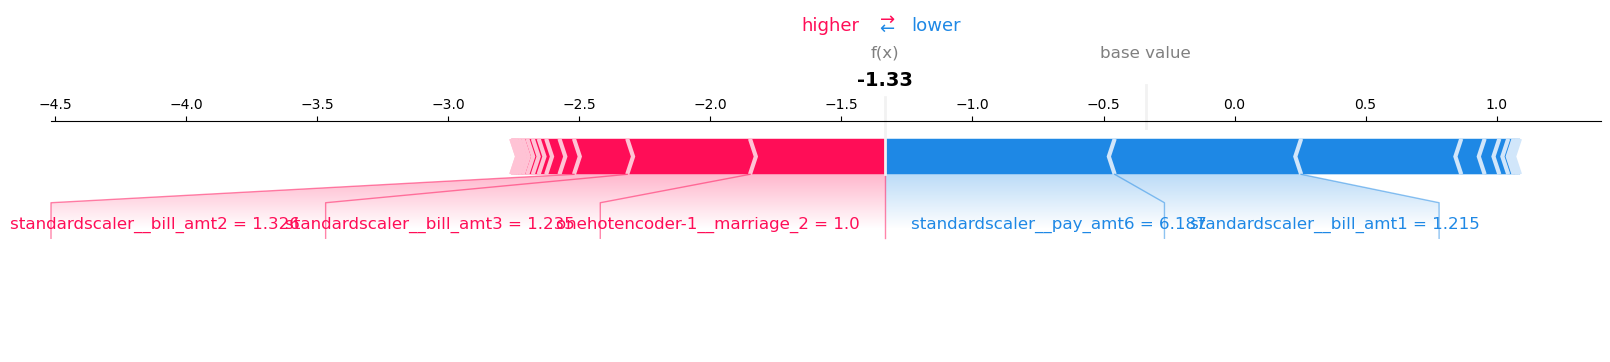

No default prediction probability [0.79122483 0.20877517]


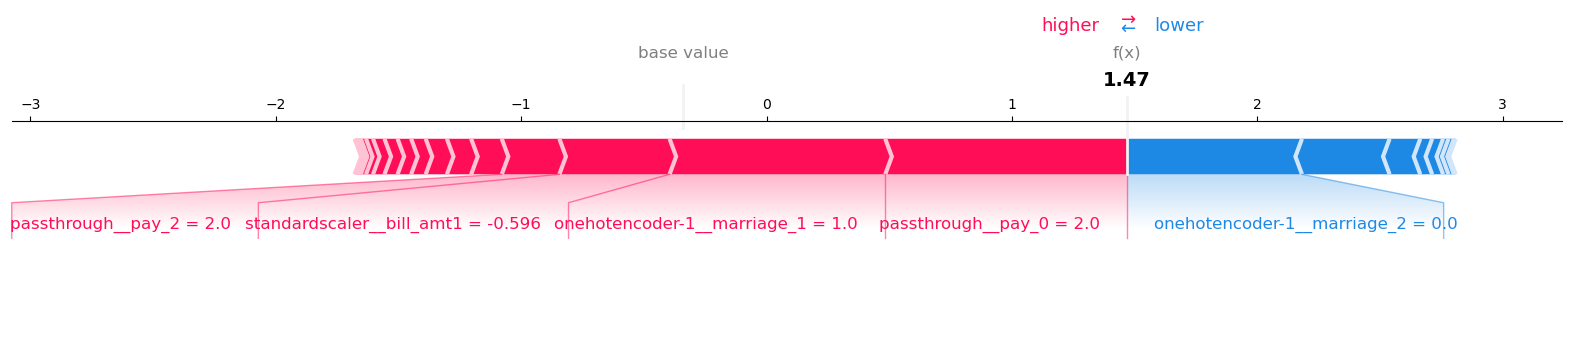

Default prediction probability [0.18721428 0.81278572]


In [77]:
# index target to find examples for prediction
y_test_reset = y_test.reset_index(drop=True)

no_default_ind = y_test_reset[y_test_reset == 0].index.tolist()
default_ind = y_test_reset[y_test_reset == 1].index.tolist()

# get a test prediction
ex_no_default_index = no_default_ind[1212]      # example that is predicting no default 
ex_default_index = default_ind[10]            # example that is predicting default 

# SHAP force plot for no default test prediction
shap.force_plot(
    lr_explainer.expected_value,
    test_lr_shap_values[ex_no_default_index, :],
    X_test_enc.iloc[ex_no_default_index, :],
    matplotlib=True,
)
# compare with model prediction
no_default_prob = best_model_lr.predict_proba(X_test)[ex_no_default_index] 
print('No default prediction probability', no_default_prob)     # prediction is right, no default

# SHAP force plot for default test prediction
shap.force_plot(
    lr_explainer.expected_value,
    test_lr_shap_values[ex_default_index, :],
    X_test_enc.iloc[ex_default_index, :],
    matplotlib=True,
)
# compare with model prediction
default_prob = best_model_lr.predict_proba(X_test)[ex_default_index] 
# compare SHAP force plot with predict proba
print('Default prediction probability', default_prob)           # prediction is right, default

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

In addressing the problem of predicting whether a customer will default on their payment next month or not, we cross-validated and tuned a variety of models to find the best performing model. We chose to use recall as our metric to measure performance in this context as we want to identify as many customers potentially requiring interventions, but are not as concerned with accidentally reaching out to customers who will not in fact default on their next payment. Unfortunately, despite trying a wide variety of models and conducting hyperparameter optimization, we were only able to achieve a recall of about 0.65. Potentially, the features we had access to might not have been the most informative for our prediction problem or the relationships may be hard to capture with the models we used. To improve performance, we may want to collect more data for our training or consult experts to conduct some feature engineering and selection to extract more relevant information. The feature engineering that was performed did not help and without the domain specific knowledge to extract more insights from the features, we are unfortunately unsuccessful in our attempt at creating stronger features to predict whether or not a customer will default.

In [78]:
# Visualise summarised scores of each model
results_summary_df = (
    pd.DataFrame(cross_val_results)
    .T.drop(["fit_time", "score_time", "test_accuracy", "train_accuracy"], axis=1)
    .sort_values(by="test_recall", ascending=False)
    .iloc[:, [2, 3, 0, 1, 4, 5]]
)
results_summary_df

,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
Tuned Logistic Regression,0.646 (+/- 0.017),0.659 (+/- 0.006),0.369 (+/- 0.018),0.373 (+/- 0.003),0.469 (+/- 0.015),0.477 (+/- 0.003)
New Feats Tuned Logistic Regression,0.642 (+/- 0.007),0.648 (+/- 0.005),0.433 (+/- 0.013),0.440 (+/- 0.004),0.517 (+/- 0.009),0.524 (+/- 0.004)
Tuned SVC,0.583 (+/- 0.010),0.615 (+/- 0.007),0.478 (+/- 0.024),0.509 (+/- 0.008),0.525 (+/- 0.016),0.557 (+/- 0.004)
Random Forest,0.383 (+/- 0.031),0.998 (+/- 0.001),0.637 (+/- 0.010),1.000 (+/- 0.000),0.478 (+/- 0.026),0.999 (+/- 0.001)
Tuned Random Forest,0.383 (+/- 0.031),0.998 (+/- 0.001),0.637 (+/- 0.010),1.000 (+/- 0.000),0.478 (+/- 0.026),0.999 (+/- 0.001)
Tuned Stacking Model,0.371 (+/- 0.016),0.511 (+/- 0.011),0.677 (+/- 0.025),0.913 (+/- 0.015),0.479 (+/- 0.016),0.655 (+/- 0.013)
Stacking Model,0.347 (+/- 0.018),0.490 (+/- 0.014),0.677 (+/- 0.029),0.949 (+/- 0.016),0.458 (+/- 0.014),0.647 (+/- 0.015)
SVC,0.338 (+/- 0.022),0.367 (+/- 0.005),0.685 (+/- 0.033),0.729 (+/- 0.006),0.452 (+/- 0.024),0.488 (+/- 0.005)
RFE Random Forest,0.328 (+/- 0.033),0.737 (+/- 0.174),0.515 (+/- 0.076),0.918 (+/- 0.071),0.398 (+/- 0.026),0.814 (+/- 0.134)
RFE SVC,0.315 (+/- 0.019),0.325 (+/- 0.008),0.699 (+/- 0.025),0.717 (+/- 0.013),0.434 (+/- 0.019),0.447 (+/- 0.007)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

Wilfred: My biggest takeaway from this course is that models can't simply be used to predict or classify, they also require a great deal of knowledge to understand why they operate how they do such the metrics they use, the features they deem important or the ways in which they are regulated.

Kai: My biggest takeaway from this course has been the general exploration of what goes on under the hoods of a lot of the models (and more) from 571; not just in terms of exploring a bit more deeply how they work, but also how certain parameters of each model work, and when/how/why to apply them most effectively. For example, before performing hyperparameter optimization on a set of models in given task, I often have a intuitive notion of what might be good values for the models to test, but the results sometimes end up being drastically different than I would've thought, often counterintuitively-so. Learning more about how and why this can be the case, and the effects of something like this happening, have been extremely valuable to learn about.

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: